# Data Visualisation: Portfolio

# Introduction

This portfolio shows different analysis performed on different types of graphs ranging from Bar chart,pie chart, pair plot, Sankey diagram, line plot which is interactive through dropdown widget to geospatial graphs. I have used data to ink ratio effectively to show as much data as possible with the amount of ink used. Also, Aesthetics like color, position, text are used throughout the portfolio. I have used 3 datasets from Kaggle – which is a open source platform where many datasets are available and can be used for analysis. The first dataset is [CO2 Emissions around the world](https://www.kaggle.com/datasets/koustavghosh149/co2-emission-around-the-world), this was taken from [World Data Bank](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC). The second dataset is [Train stations in Europe](https://www.kaggle.com/datasets/headsortails/train-stations-in-europe), this was taken from [Trainline EU](https://www.thetrainline.com/en-us?redirected=true) and was published on [GitHub](https://github.com/trainline-eu/stations). The third dataset is [Life Expectancy](https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization), this was taken from the [World Health Organization](https://www.who.int/). Finally, the FIFA 22 World cup data was taken from the [official FIFA website](https://www.fifa.com/fifaplus/en/tournaments/mens/worldcup/qatar2022/knockout-and-groups).

# Analysis using different Graphs

Bar Chart

Line Chart with interactive Widget

Pair Plot

Sankey Diagram

Geospatial plots

Pie Chart

In this section i will be importing all the necessary libraries required for my Portfolio analysis

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objects as go

In this section i am importing all the 3 datasets which is obtained from Kaggle

In [86]:
df_Life_Expectancy=pd.read_csv("Life Expectancy Data.csv")
df_Train_stations=pd.read_csv("train_stations_europe.csv")
df_CO2_Emission=pd.read_csv("CO2_emission.csv")


# Bar Graphs

In this section, I have plotted 4 Bar Graphs. I have used [matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) and [Seaborn](https://seaborn.pydata.org/tutorial/function_overview.html) python libraries for plotting the graph and for labelling the axis and title.
1st and 2nd Bar graphs are relatively simple Bar Graphs which show the top 10 and bottom 10 countries which emit CO2 in (metric tons per capita) for the specific year 1990. Since the dataset started from 1990 I have taken the 1st year to see the most and least CO2 emitting countries.


In [115]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html
highest_emitting_countries = df_CO2_Emission.nlargest(10,'1990')

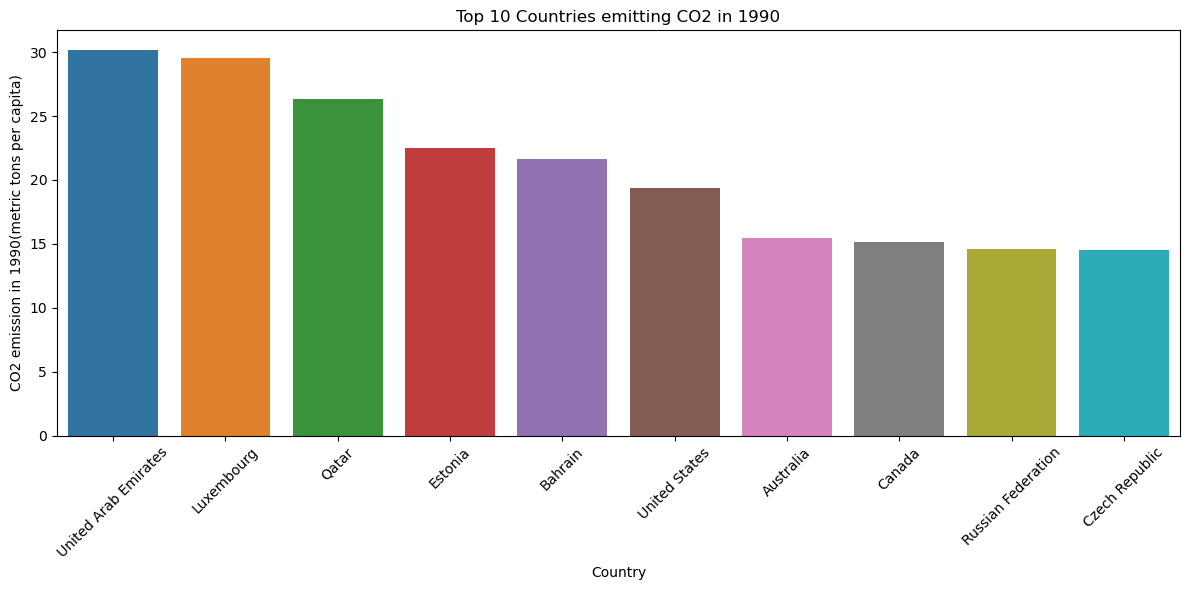

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country Name',y='1990',data=highest_emitting_countries)
plt.xlabel('Country')
plt.ylabel('CO2 emission in 1990(metric tons per capita)')
plt.title('Top 10 Countries emitting CO2 in 1990')
plt.xticks(rotation=45) #https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
plt.tight_layout() #https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
plt.show()

                                         Fig.1 Top 10 Countries emitting CO2 in 1990

In [117]:
##https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html
lowest_emitting_countries = df_CO2_Emission.nsmallest(10,'1990')

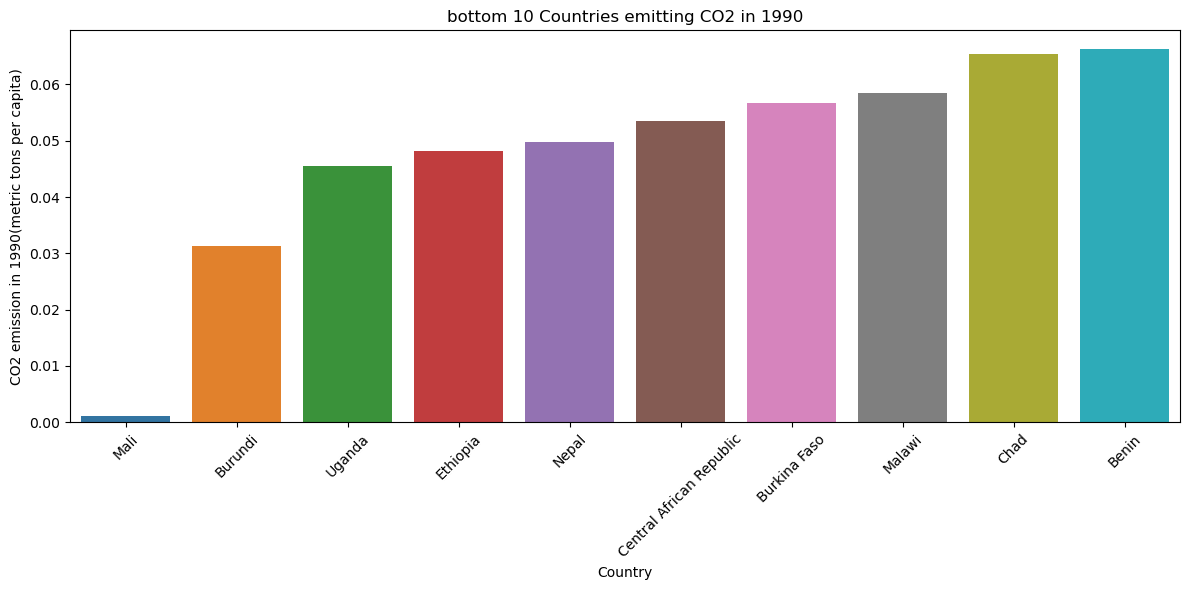

In [118]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country Name',y='1990',data=lowest_emitting_countries)
plt.xlabel('Country')
plt.ylabel('CO2 emission in 1990(metric tons per capita)')
plt.title('bottom 10 Countries emitting CO2 in 1990')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                     Fig.2 Bottom 10 Countries emitting CO2 in 1990

The 3rd and 4th Bar graph compares how these countries have performed in the year 1990 and 2019. 
We can clearly see that the countries which emit the highest amount of CO2 have controlled their CO2 emission in the year 2019. Countries like Australia, Canada still have similar Co2 emissions in both the years. Other countries have tried to produce less CO2 and Estonia is one country which has significantly reduced their CO2 emission. We can see the color aesthetic blue used for the year 1990 and orange used for the year 2019.

The 4th Bar graph also compares countries which produced less CO2 in 1990 with the year 2019. Countries like Mali, Benin, and Nepal are producing CO2 at high rate. It is interesting to see that  Central African Republic has produced least amount of CO2 in both 1990 and 2019.


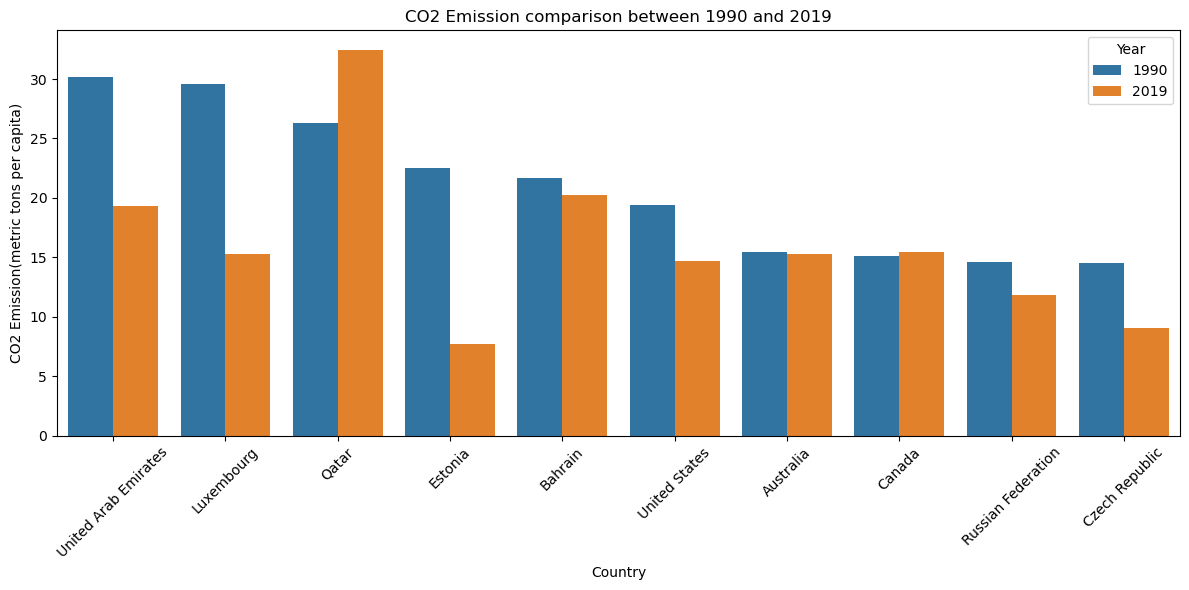

In [119]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
highest_emitting_countries_melted = highest_emitting_countries.melt(id_vars='Country Name', value_vars=['1990','2019'], var_name='Year',value_name='CO2 Emission')


#converting year column to int format
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
highest_emitting_countries_melted['Year'] = highest_emitting_countries_melted['Year'].astype(int)

#plotting CO2 emission for top 10 countries from 1990 and comparing that with 2019 
plt.figure(figsize=(12,6))
sns.barplot(x='Country Name',y='CO2 Emission', hue='Year', data=highest_emitting_countries_melted)
plt.xlabel('Country')
plt.ylabel('CO2 Emission(metric tons per capita)')
plt.title("CO2 Emission comparison between 1990 and 2019")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

                               Fig.3 CO2 Emission comparison between top 10 countries from 1990 with 2019    

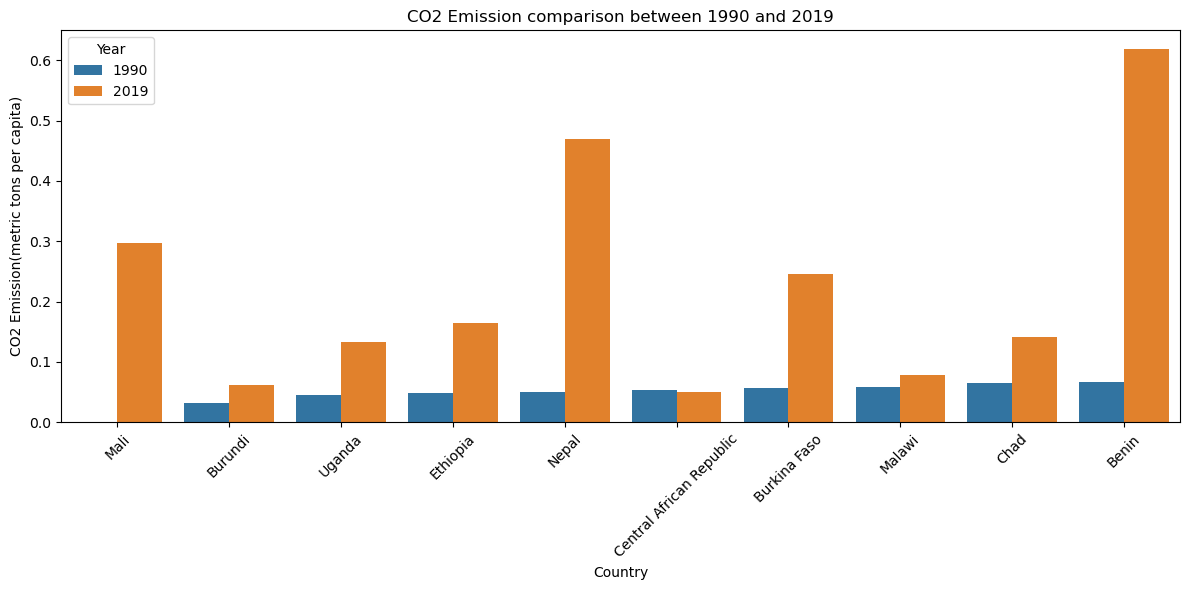

In [120]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
lowest_emitting_countries_melted = lowest_emitting_countries.melt(id_vars='Country Name', value_vars=['1990','2019'], var_name='Year',value_name='CO2 Emission')


#converting year column to int format
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
lowest_emitting_countries_melted['Year'] = lowest_emitting_countries_melted['Year'].astype(int)

#plotting CO2 emission for bottom 10 countries from 1990 and comparing that with 2019
plt.figure(figsize=(12,6))
sns.barplot(x='Country Name',y='CO2 Emission', hue='Year', data=lowest_emitting_countries_melted)
plt.xlabel('Country')
plt.ylabel('CO2 Emission(metric tons per capita)')
plt.title("CO2 Emission comparison between 1990 and 2019")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

                             Fig.4 CO2 Emission comparison between bottom 10 countries from 1990 with 2019 

# Line chart with Interactive Widget

Here I have plotted a line chart for CO2 emission for a specifically selected country which has a range from 1990 to 2019. Here I have used the pandas.melt concept of melting the data, this is like unpivoting the table to get more insight of the data. Here the pandas automatically Unpivots the data frame which is in wide format to long format and the new column named year is converted to numeric by using [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html). 

I have used seaborn for plotting and matplotlib for labelling the axis and title. Here, I have also used a dropdown widget for selecting different countries. Here the widget along with the line chart acts as an interactive dashboard. If we want to see the CO2 emission trend for any country, we can select that country, for example when I selected United Kingdom it showed CO2 emission from 1990 to 2019. The trend clearly shows that United Kingdom which was producing around 10 metric tons per capita of CO2 emission in 1990 has gradually reduced to around 5 metric tons per capita of CO2 emission in 2019. In the bar graph Qatar was producing the most CO2 emission so if we see Qatar in this line graph, we can see that in 1990 it produced around 25 metric tons per capita of CO2 emission and it rose drastically between the years 1998 till 2005 after which it gradually started decreasing again and stopped at around 32 metric tons per capita of CO2 emission in the year 2019. For future scope I would like to create another widget where we can search a country by typing so that it would take less time to search for a particular country if we already know which country’s emission we are interested in.


In [91]:
df_CO2_Emission_melted=df_CO2_Emission.melt(id_vars=['Country Name'], var_name='Year', value_name='CO2 Emissions')
df_CO2_Emission_melted = df_CO2_Emission_melted.dropna() #dropna is used to remove any null value which is present

#converting the year column to numeric format
#https://stackoverflow.com/questions/40095712/when-to-applypd-to-numeric-and-when-to-astypenp-float64-in-python
df_CO2_Emission_melted['Year']=df_CO2_Emission_melted['Year'].apply(pd.to_numeric, errors='coerce')

#taking the data from years 1990-2019
df_CO2_Emission_melted= df_CO2_Emission_melted[(df_CO2_Emission_melted['Year'] >= 1990) &(df_CO2_Emission_melted['Year'] <= 2019)]

#plotting line chart for specific selected country to show CO2 Emission across the years
#https://stackoverflow.com/questions/65064137/geopandas-how-to-plot-countries-cities
def plot_country_trend(country):
    plt.figure(figsize=(12,6))
    country_data = df_CO2_Emission_melted[df_CO2_Emission_melted['Country Name'] ==country]
    sns.lineplot(data=country_data, x='Year', y='CO2 Emissions')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission(metric tons per capita)')
    plt.title('CO2 Emission Trend for specific country from 1990 to 2019')
    plt.xticks(ticks=range(1990,2020), rotation = 45) #https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
    plt.show()
    
    

#creating dropdown widget for country selection
country_dropdown = widgets.Dropdown(
    options=df_CO2_Emission['Country Name'].unique(),
    description = 'Country:',
    value = df_CO2_Emission['Country Name'].unique()[0],
    )



#https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
interact(plot_country_trend, country=country_dropdown)
plt.show()

interactive(children=(Dropdown(description='Country:', options=('Aruba', 'Afghanistan', 'Angola', 'Albania', '…

                                      Fig.5 Interactive Line chart with Dropdown Widget 

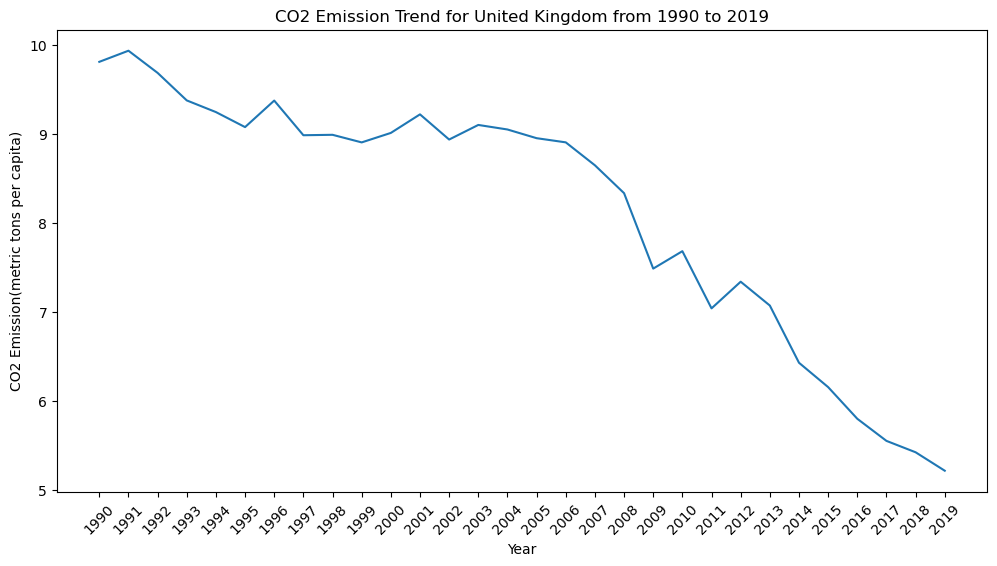

In [29]:
plt.figure(figsize=(12,6))
UK_data = df_CO2_Emission_melted[df_CO2_Emission_melted['Country Name'] == 'United Kingdom']
sns.lineplot(data=UK_data, x='Year', y='CO2 Emissions') 
plt.xlabel('Year')
plt.ylabel('CO2 Emission(metric tons per capita)')
plt.title('CO2 Emission Trend for United Kingdom from 1990 to 2019') 
plt.xticks(ticks=range(1990,2020), rotation = 45) #https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
plt.show()                                                    

                                        Fig.6 CO2 Emission Trend for United Kingdom from 1990 to 2019

# Sankey Diagram

There are other applications of Sankey diagram like comparing the budget spent while joining a university, the different stages can be used as a node and can be seen in aa Sankey diagram. But as I have an interest in sports, I took the recently concluded FIFA world cup for this analysis. Here I have manually entered the football team’s data based on the results given on the FIFA official website.
I have avoided including group stages as there are a total of 8 groups consisting of 4 teams each. 2 teams qualify from each group. So, I have added the qualified teams along with R16(Round of 16), Quarter, Semi, Final in the nodes after assigning indexes to each of them with the help of node id and storing them in a dictionary. I have used color aesthetics here. Each team is assigned with different colors so that it will be easy to understand which team progresses to the next round. Links are used to join the source node and target node. These links show the same color if a team progresses to the next round. From the figure we can see that semi – final was played between Argentina vs Croatia and Morocco vs France. France and Argentina played the finals and Argentina won the world cup.


In [92]:
#Defining the nodes
node_name = [
    "Qatar","Ecuador","Senegal","Netherlands","England","Iran","Usa",
    "Wales","Argentina","Saudi Arabia","Mexico","Poland","France",
    "Australia","Denmark","Tunisia","Spain","Costa Rica","Germany",
    "Japan","Belgium","Canada","Morocco","Croatia","Brazil","Serbia",
    "Switzerland","Cameroon","Portugal","Ghana","Uruguay","Korea Republic",
    "R16_1", "R16_2", "R16_3", "R16_4",
    "R16_5", "R16_6", "R16_7", "R16_8",
    "Quarter1", "Quarter2","Quarter3", "Quarter4",
    "Semi1", "Semi2",
    "Final",
    "Winner"
]

In [93]:
node_ids = range(len(node_name))

In [94]:
nodes=dict(zip(node_name,node_ids))

In [95]:
node_colours = ['red', 'blue','green','yellow','black']

In [96]:
#creating nodes
node_definition = dict(
    pad= 1,
    thickness=1,
    line=dict(color = 'red', width =1),
    label=node_name,
    color=node_colours
)

In [97]:
#Assigning source nodes
sources = [nodes['Netherlands'],nodes['Usa'],nodes['Argentina'],nodes['Australia'],nodes['France'],nodes['Poland'],nodes['England'],
          nodes['Senegal'],nodes['Japan'],nodes['Croatia'],nodes['Brazil'],nodes['Korea Republic'],nodes['Morocco'],nodes['Spain'],
          nodes['Portugal'],nodes['Switzerland'],
          nodes['R16_1'],nodes['R16_2'],nodes['R16_3'],nodes['R16_4'],nodes['R16_5'],nodes['R16_6'],nodes['R16_7'],nodes['R16_8'],
          nodes['Quarter1'],nodes['Quarter2'],nodes['Quarter3'],nodes['Quarter4'],
          nodes['Semi1'],nodes['Semi2'],
          nodes['Final']
           ]

In [98]:
#Assigning Target nodes
targets = [nodes['R16_1'], nodes['R16_1'],nodes['R16_2'],nodes['R16_2'],nodes['R16_3'],nodes['R16_3'],nodes['R16_4'],nodes['R16_4'],
           nodes['R16_5'],nodes['R16_5'],nodes['R16_6'],nodes['R16_6'],nodes['R16_7'],nodes['R16_7'],nodes['R16_8'],nodes['R16_8'],

           nodes['Quarter1'], nodes['Quarter1'],nodes['Quarter2'],nodes['Quarter2'],nodes['Quarter3'],nodes['Quarter3'],nodes['Quarter4'],nodes['Quarter4'],
           nodes['Semi1'],nodes['Semi1'],nodes['Semi2'],nodes['Semi2'],
           nodes['Final'],nodes['Final'],
           nodes['Winner']

           ]

In [99]:
values = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,
          1,1,1,1,
          1,
          1

          ]

In [100]:
#Assigning colours to link
link_colours=['orange','blue','black','yellow','brown','cyan','gold','green',
              'purple','silver','darkblue','lime','aqua','violet','skyblue','maroon',

              'orange','black','silver','gold','brown','darkblue','aqua','skyblue',

              'black','silver','brown','aqua',
              'black','brown',
              'black'
              ]


In [101]:
#creating links
link_definition = dict(
    source = sources,
    target = targets,
    value = values,
    color = link_colours,
  
)

In [102]:
fig = go.Figure(data = [go.Sankey(
    node = node_definition,
    link = link_definition
)])

In [103]:
#https://stackoverflow.com/questions/36262748/save-plotly-plot-to-local-file-and-insert-into-html
output_file_path = "Sankey diagram for FIFA world cup.html"  
pio.write_html(fig, file=output_file_path, auto_open=True)
fig.show()

                                 Fig.7 Sankey Diagram of FIFA 22 World Cup

# Geospatial analysis 

# Using mapbox

For this analysis I have used Train stations in Europe dataset. In this visual I have used map box from [plotlyexpress](https://plotly.com/python/plotly-express/) to do the geospatial analysis, to show number of train stations which are available in Europe. Since there were many train stations available in Europe, I set the country to ‘GB’ which is Great Britain and is_city to ‘TRUE’ as these were the confirmed stations. From the graph we can see that the southeast part of Great Britain has the greatest number of train stations. There are a good number of stations in the central part of GB. Less Train stations can be seen in south and southwest parts of GB, and we can hardly see some stations in north part. If we zoom or hover over the map, we can see the train station’s name. This analysis is helpful because we can see which is our nearest train station after looking at the map visual.

In [108]:
df_uk = df_Train_stations[df_Train_stations['country'] == 'GB']
df_uk = df_uk[df_uk['is_city'] == True]

In [114]:
#https://stackoverflow.com/questions/63787612/plotly-automatic-zooming-for-mapbox-maps
fig=px.scatter_mapbox(df_uk,
                     lat='latitude',lon='longitude',
                     hover_name='name_norm',
                     zoom=4,
                     size_max=100,
                     height=700)

                    
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Confirmed Train Stations across Great Britain')
output_file_path = "Confirmed Train Stations across Great Britain.html"  #https://stackoverflow.com/questions/36262748/save-plotly-plot-to-local-file-and-insert-into-html
pio.write_html(fig, file=output_file_path, auto_open=True)
fig.show()
             

                          Fig.8 Geospatial analysis using mapbox for train stations across Great Britain

# Pair Plot

Here I have used seaborn for plotting the pair plot.
For this pair plot I have taken 4 parameters into consideration – Life expectancy, adult mortality, GDP, and Alcohol. If we look at the pair plot here and we compare GDP and life expectancy, we clearly see that if a person earns more, he will have a longer life compared to a person who earns less. This might be because they can afford a better home and proper food. If we compare adult mortality with alcohol consumption, we see that for high alcohol consumption high adult mortality is there and for less alcohol consumption it is less. 
If we compare life expectancy with alcohol consumption, this surprisingly shows that with more alcohol consumption people have more life expectancy, but it should be other way around. If someone consumes lots of alcohol, then his life expectancy should be less.


C:\Users\rabhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



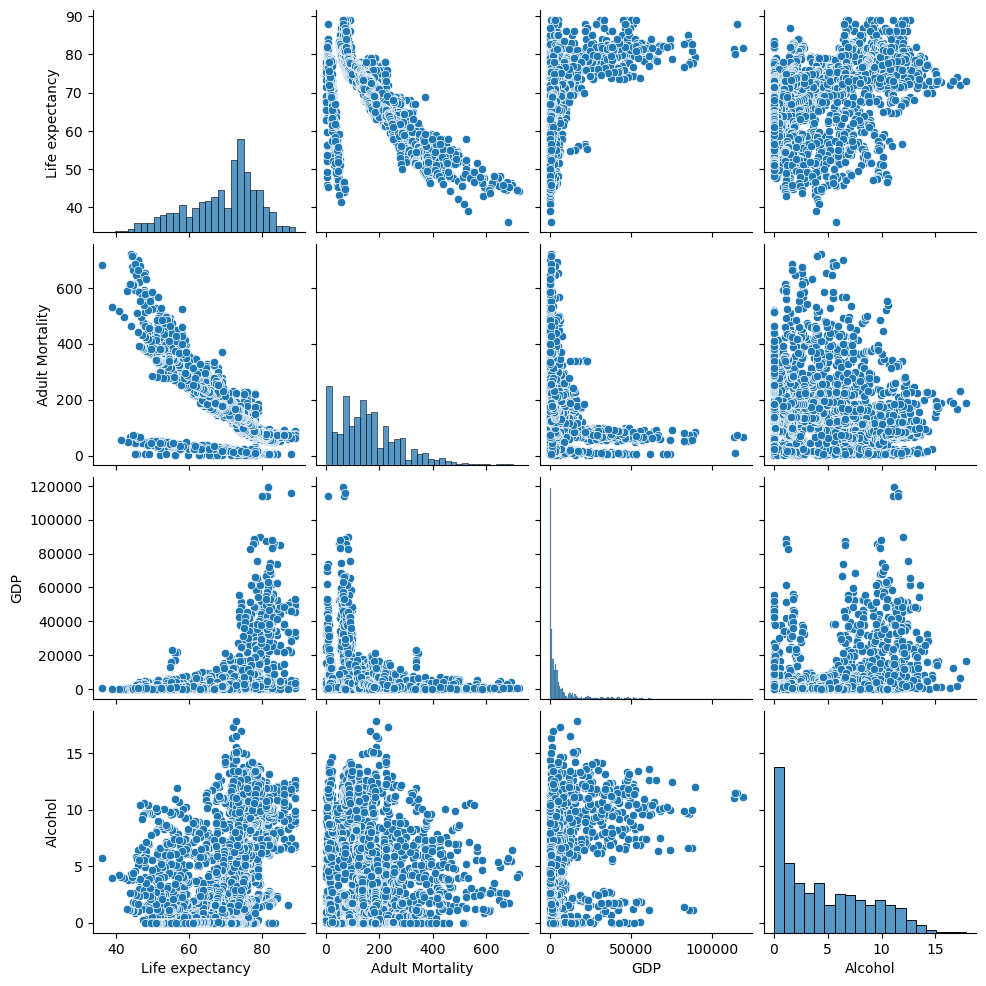

In [110]:
sns.pairplot(df_Life_Expectancy, vars=['Life expectancy ', 'Adult Mortality', 'GDP', 'Alcohol'])
plt.show()

                         Fig.9 Pair plot of 4 parameters Life expectancy, adult mortality, GDP, and Alcohol.

# Geospatial analysis using Choropleth

For this geospatial analysis I have used scatter maps concept and have plotted choropleth map visual since it is visually much better than scatter maps for this life expectancy analysis as scatter map only shows a circle with similar data across the map. I have also used animation for this map as the years range from 2000-2015. Here, I have used natural earth type of projection for map style. 
From the graph, we can clearly see that the European countries like Finland, Germany, Belgium, France, Spain, Italy and some more European countries along with Canada, Australia and some south American countries have high life expectancy of close to 80 or more. Asian countries like India, Pakistan, Indonesia, Malaysia have life expectancy close to 60 and countries like Niger, Nigeria, Mali, Cameroon all have life expectancy which is almost less than 50.


In [112]:
fig = px.choropleth(df_Life_Expectancy, locations='Country', locationmode='country names', color='Life expectancy ',
                    hover_name='Country',
                    animation_frame = 'Year',
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.Plasma) #https://plotly.com/python/builtin-colorscales/
fig.update_layout(title='Life Expectancy across the world')
output_file_path = "Life Expectancy across the world.html"  #https://stackoverflow.com/questions/36262748/save-plotly-plot-to-local-file-and-insert-into-html
pio.write_html(fig, file=output_file_path, auto_open=True)
fig.show()

                                        Fig.10 Life Expectancy across the world using choropleth

# Pie Chart

From the pie chart we can see that most of the countries (83.42%) are still in the developing stage. Very few countries (16.58%) of all countries are developed, which is very less. So, by this graph many countries must focus on steps which can be taken to make their country as a developed country to provide better life style for people who are staying in those countries.

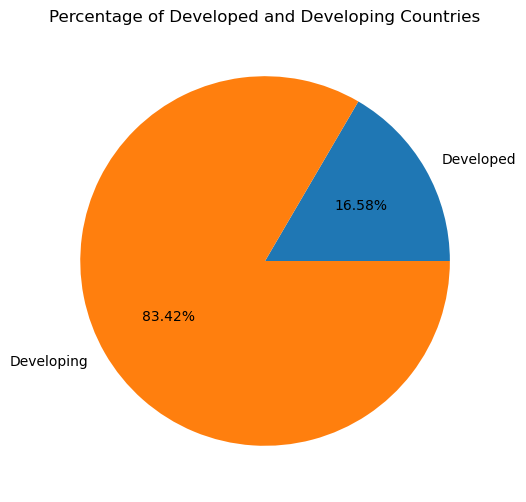

In [113]:
#https://stackoverflow.com/questions/59644751/show-both-value-and-percentage-on-a-pie-chart
Countries_Development = df_Life_Expectancy.groupby('Status')['Country'].nunique()
plt.figure(figsize=(10,6))
plt.pie(Countries_Development, labels = Countries_Development.index,autopct='%.2f%%')
plt.title('Percentage of Developed and Developing Countries')
plt.show()

                       Fig.11 Percentage of Developed vs Developing countries

# Conclusion

To conclude, we have found the countries which emit the highest and lowest CO2 for the year 1990 and compared those with the year 2019. With the help of widget and line chart we were able to select CO2 emission for a selected country and a line chart for UK was also plotted between 1990 and 2019. Sankey diagram was plotted for FIFA world cup which saw Argentina as the winner. Geospatial analysis using map box was plotted to see number of train stations in ‘GB’. Choropleth was plotted to show life expectancy across the world. A pair plot was used to compare Life Expectancy, Alcohol consumption, GDP, and adult mortality. Finally pie chart was plotted to see percentage of developed vs developing countries. For future scope I would like to explore more about widget and other interactive features. As i was not able to export interactive line chart with widget. So i have uploaded the video of it.

# References

https://www.kaggle.com/datasets/koustavghosh149/co2-emission-around-the-world

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

https://www.kaggle.com/datasets/headsortails/train-stations-in-europe

https://www.thetrainline.com/en-us?redirected=true

https://github.com/trainline-eu/stations

https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization

https://www.who.int/

https://www.fifa.com/fifaplus/en/tournaments/mens/worldcup/qatar2022/knockout-and-groups

https://matplotlib.org/stable/tutorials/pyplot.html

https://seaborn.pydata.org/tutorial/function_overview.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html

https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

https://stackoverflow.com/questions/40095712/when-to-applypd-to-numeric-and-when-to-astypenp-float64-in-python

https://stackoverflow.com/questions/65064137/geopandas-how-to-plot-countries-cities

https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

https://plotly.com/python/plotly-express/

https://stackoverflow.com/questions/59644751/show-both-value-and-percentage-on-a-pie-chart

https://plotly.com/python/builtin-colorscales/

https://stackoverflow.com/questions/36262748/save-plotly-plot-to-local-file-and-insert-into-html

https://stackoverflow.com/questions/63787612/plotly-automatic-zooming-for-mapbox-maps